# CDS Index Vs. Equity Options

### Rationale

In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from xbbg import blp

In [597]:
def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())
    #plt.axvline(x=pd.to_datetime("2020-03-09"), c="k")
    plt.show()
    return "Plot!"

In [637]:
# Get Data

Start = "20000101"
End = ""

#TickerList = ["ITRXTX5I Index", "PUTWD=2 OC Equity"]

TickerList = ["IBOXIG Index", "PUT Index"]

df = blp.bdh(TickerList, "PX_Last", start_date=Start)
df.columns = ["IBOXX", "SPXPuts"]


In [638]:
Ret = (np.log(df) - np.log(df.shift(1))).dropna()


In [639]:
VIX = blp.bdh("VIX Index", "PX_Last", start_date=Start)
VIX = ((VIX / VIX.shift(-1)) - 1).shift(1).dropna()
tes = (VIX - VIX.rolling(252).mean()) / (VIX.rolling(252).std())
tes = tes.rolling(20).mean()

In [640]:
Returns = pd.concat((Ret, tes), axis = 1)
Returns.columns = ["IBOXX", "SPXPuts", "VIX"]

In [645]:
Ret["Strategy"] = (Ret["SPXPuts"] + Ret.IBOXX) / 2

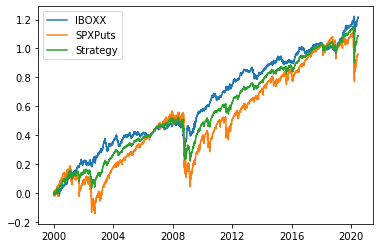

In [646]:
plt.plot(Ret.cumsum())
plt.legend(Ret.columns)
plt.show()

In [647]:
Ret["Strategy"] = (Ret["SPXPuts"] * Returns.VIX  + Ret.IBOXX * (1 - Returns.VIX)) / 2


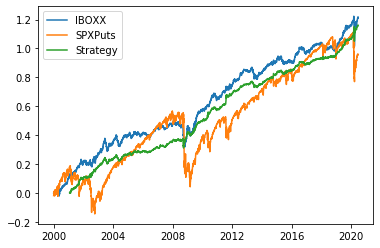

In [648]:
plt.plot(Ret.cumsum())
plt.legend(Ret.columns)
plt.show()

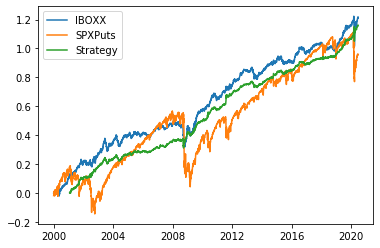

In [649]:
plt.plot(Ret.cumsum())
plt.legend(Ret.columns)
plt.show()

Sharpe 1.031104670549289


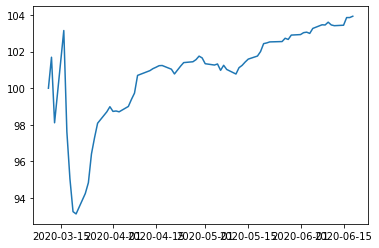

'Plot!'

In [656]:
Plot(Ret.Strategy[-70:])

Sharpe 0.8188608408824305


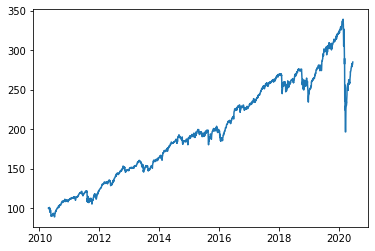

'Plot!'

In [524]:
Plot(Ret.Strategy.iloc[-252*10:])

Sharpe -0.14029826489677902


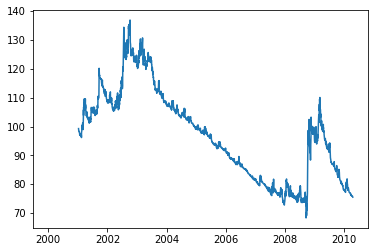

'Plot!'

In [519]:
Plot(Ret.Strategy.iloc[:-252*10])

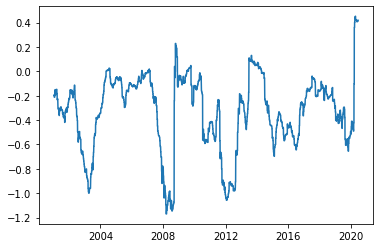

In [520]:
plt.plot(Returns.Beta)

In [500]:
Returns = pd.concat((Returns, pd.Series(dico).shift(1)), axis = 1)

C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [501]:
Returns.to_csv("DefensiveStrategyDraft1.csv")

In [502]:
Ret

,IBOXX,SPXPuts,Strategy
2020-01-03,0.005103,-0.002975,NaN
2020-01-06,-0.004231,0.002425,NaN
2020-01-07,-0.002444,-0.000283,NaN
2020-01-08,-0.003564,0.001539,NaN
2020-01-09,0.004188,0.002009,NaN
...,...,...,...
2020-06-12,-0.000674,0.004873,NaN
2020-06-15,0.000514,0.002231,NaN
2020-06-16,0.007750,0.000704,NaN
2020-06-17,0.000018,0.000150,NaN


In [503]:
16 * Ret.Strategy.dropna().iloc[-252*10:].mean() / Ret.Strategy.dropna().iloc[-252*10:].std()


nan